## Scalars(rank-0 tensors)

In [3]:
import numpy as np

In [4]:
x = np.array(12)

In [5]:
x

array(12)

In [6]:
x.ndim

0

## Vectors(rank-1 tensors)

In [7]:
x = np.array([12, 3, 6, 14, 7])

In [8]:
x

array([12,  3,  6, 14,  7])

In [9]:
x.ndim

1

## Matrices(rank-2 tensors)

In [10]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [11]:
x.ndim

2

## Rank-3 and higher-rank tensors

In [12]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

In [13]:
x.ndim
x.shape

(3, 3, 5)

## Key attributes

In [14]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
train_images.ndim

3

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
train_images.dtype

dtype('uint8')

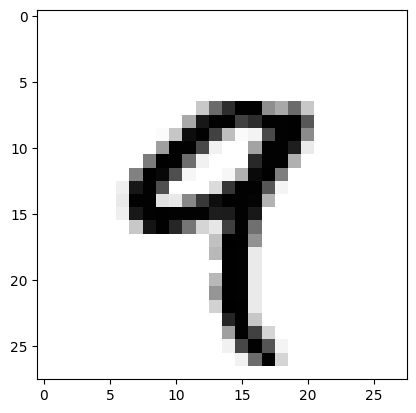

In [18]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [19]:
train_labels[4]

9

In [20]:
my_slice = train_images[10:100]

In [21]:
my_slice.shape

(90, 28, 28)

In [22]:
my_slice = train_images[10:100, :, :]

In [23]:
my_slice.shape

(90, 28, 28)

In [24]:
my_slice = train_images[10:100, 0:28, 0:28]

In [25]:
my_slice.shape

(90, 28, 28)

In [26]:
my_slice = train_images[:, 14:, 14:] # select 14 × 14 pixels in the bottom-right corner

In [27]:
my_slice.shape

(60000, 14, 14)

In [28]:
my_slice = train_images[:, 7:-7, 7:-7] # crop the images to patches of 14 × 14 pixels centered in the middle

In [29]:
my_slice.shape

(60000, 14, 14)

## The notion of data batches

In [30]:
batch = train_images[:128]

In [31]:
batch = train_images[128:256]

In [32]:
n = 3

In [33]:
batch = train_images[128 * n:128 * (n+1)] # the nth batch

In [34]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [35]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [36]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print(f"Took: {time.time() - t0} s")

Took: 0.003350973129272461 s


In [37]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print(f"Took: {time.time() - t0} s")

Took: 0.7685880661010742 s


In [38]:
x = np.random.random((32, 10))
y = np.random.random((10, ))

In [39]:
x.shape

(32, 10)

In [40]:
y.shape

(10,)

In [41]:
y = np.expand_dims(y, axis=0)

In [42]:
y.shape

(1, 10)

In [43]:
Y = np.concatenate([y] * 32, axis=0)

In [44]:
Y.shape

(32, 10)

In [45]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [46]:
x = np.random.random((2, 10))
y = np.random.random(10)
print(x.shape)
print(y.shape)

(2, 10)
(10,)


In [47]:
naive_add_matrix_and_vector(x, y)

array([[0.76716456, 0.90028178, 0.95133921, 0.69720792, 0.96202422,
        1.45098835, 1.68455522, 0.78226217, 1.07757159, 0.9767948 ],
       [0.50878473, 0.5740991 , 1.01064356, 0.66563512, 1.36704907,
        1.44643909, 1.41020515, 0.17287671, 1.30098188, 1.36777725]])

In [48]:
x = np.random.random((64, 3, 32, 10)) 
y = np.random.random((32, 10))
z = np.maximum(x, y)
x.shape

(64, 3, 32, 10)

In [49]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

9.648806667173178

In [50]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [51]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [52]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [53]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [63]:
x = np.array([[0.0, 1.0], [2.0, 3.0], [4.0, 5.0]])
print(x.shape)
print(x)

(3, 2)
[[0. 1.]
 [2. 3.]
 [4. 5.]]


In [64]:
x = x.reshape((6,1))
print(x.shape)
print(x)


(6, 1)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [66]:
x = x.reshape((2,3))
print(x.shape)
print(x)

(2, 3)
[[0. 1. 2.]
 [3. 4. 5.]]


In [67]:
x = np.zeros((300,20))
print(x.shape)
x = np.transpose(x)
print(x.shape)

(300, 20)
(20, 300)


In [75]:
import tensorflow as tf

x = tf.Variable(0.0)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
print(grad_of_y_wrt_x)

tf.Tensor(2.0, shape=(), dtype=float32)


In [77]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.91290545, 0.91290545],
        [0.7237843 , 0.7237843 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [79]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)) # Convert 2D (28 * 28) to 1D vector (28 * 28 = 764)
train_images = train_images.astype("float32") / 255 # We’ll transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float") / 255

In [80]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [92]:
opt = keras.optimizers.SGD()
opt = keras.optimizers.RMSprop()
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [93]:
history = model.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9987 - loss: 0.0059 - val_accuracy: 0.9822 - val_loss: 0.0647
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.9815 - val_loss: 0.0710
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9827 - val_loss: 0.0687
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 0.9827 - val_loss: 0.0686
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9815 - val_loss: 0.0732
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9831 - val_loss: 0.0708
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 8.6427e-04 - val_accuracy: 0.9826 - val_loss: 0.0705
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 4.9738e-04 - val_accu

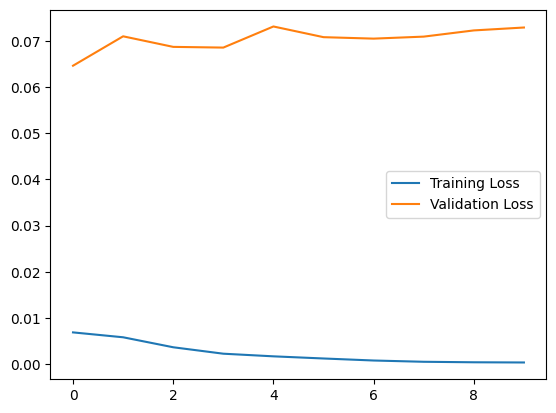

In [94]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()